In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing Data
dataset1 = pd.read_csv(r'y_totalCost.csv')
dataset1['Total-Quantity-Sold'] = dataset1['Total-Quantity-Sold'].astype(np.int64)
dataset1['Total-Product-Revenue'] = dataset1['Total-Cost'].astype(np.int64)
dataset1['Return on Sales'] = dataset1['Return on Sales'].astype(np.int64)
X = dataset1.iloc[:,[1,2]].values
y = dataset1.iloc[:,4].values

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [6]:
# Applying feature scaling for a more accurate predictions for
# which users will buy or not an SUV, targeting users 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train,y_train)

C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
# Introducing a new variable: the vector of predictions,
# a vector which gives a prediction for each of the test set observations 
y_pred = classifier.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 
cm 

array([[42,  1],
       [ 5,  0]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


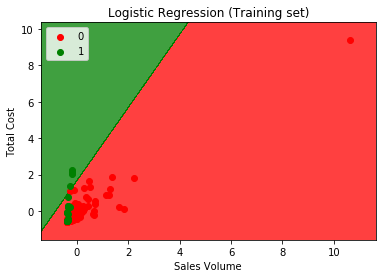

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Sales Volume')
plt.ylabel('Total Cost')
plt.legend()
plt.show()

In [11]:
from matplotlib.colors import ListedColormap
XX_set, yy_set = XX_test, yy_test
X1, X2 = np.meshgrid(np.arange(start = XX_set[:, 0].min() - 1, stop = XX_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = XX_set[:, 1].min() - 1, stop = XX_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(yy_set)):
    plt.scatter(XX_set[yy_set == j, 0], XX_set[yy_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Sales Volume')
plt.ylabel('Total Cost')
plt.legend()
plt.show()

NameError: name 'XX_test' is not defined